# Are YOU a Crossfit Games Athlete? This new data will let you know if YOU ARE (a) FIT.

https://medium.com/p/e83c04eb783e/edit

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'
from pylab import rcParams
rcParams['figure.figsize'] = 25, 10
# configure Pandas to publish table schema and data in a JSON representation
# any dataframe outputted after this will display the Data Explorer
# you can turn this off later if you want to view HTML tables instead
pd.options.display.html.table_schema = True # Data Explorer On!
# the Data Explorer performs visualization in the browser,
# so we must increase the number of rows outputted in order for it to be useful
# be careful! some datasets may be too large (see contraints section)
pd.options.display.max_rows = None

In [18]:
data_path = "/Users/pblsnt/Documents/DataScientist_Nanodegree_Udacity/Data"
crossfit_data = "/crossfit_games_data"

In [19]:
def read_file_csv(filepath, header=0, sep=','):
    return pd.read_csv(filepath_or_buffer=filepath, sep=sep, header=header)

In [20]:
crossfit_open_scores_2019_file = data_path + crossfit_data + "/2019_opens_scores.csv"
crossfit_open_athletes_2019_file = data_path + crossfit_data + "/2019_opens_athletes.csv"
crossfit_games_athletes_2019_file = data_path + crossfit_data + "/2019_games_athletes.csv"
crossfit_open_scores_2020_file = data_path + crossfit_data + "/2020_opens_scores.csv"
crossfit_open_athletes_2020_file = data_path + crossfit_data + "/2020_opens_athletes.csv"

## What does a Crossfit Athlete look like?

In [21]:
crossfit_open_athletes_2019 = read_file_csv(crossfit_open_athletes_2019_file)
crossfit_open_athletes_2019.head(100)

,competitorid,competitorname,firstname,lastname,postcompstatus,gender,profilepics3key,countryoforigincode,countryoforiginname,divisionid,affiliateid,affiliatename,age,height,weight,overallrank,overallscore,is_scaled,division
0,2536,Samantha Briggs,Samantha,Briggs,accepted,F,0e63d-P2536_14-184.jpg,GB,United Kingdom,19,4098,CrossFit Black Five,37,1.70,61.23,1,33,0,Women (35-39)
1,485089,Renata Pimentel,Renata,Pimentel,accepted,F,04e97-P485089_5-184.jpg,BR,Brazil,19,15868,CrossFit Gurkha,36,1.74,73.00,2,66,0,Women (35-39)
2,16973,Carleen Mathews,Carleen,Mathews,NaN,F,b663a-P16973_6-184.jpg,US,United States,19,10471,CrossFit Saint Helens,35,1.57,62.14,3,101,0,Women (35-39)
3,751083,Danila Capaccetti,Danila,Capaccetti,NaN,F,pukie.png,IT,Italy,19,9329,CrossFit Black Shark,35,1.70,71.00,4,139,0,Women (35-39)
4,313257,Hope Cicero,Hope,Cicero,NaN,F,f204b-P313257_1-184.jpg,US,United States,19,438,CrossFit Billings,36,1.55,61.23,5,176,0,Women (35-39)
5,121354,Corrin Lemieux,Corrin,Lemieux,NaN,F,11635-P121354_1-184.jpg,US,United States,19,18503,Great Woods CrossFit,36,1.65,66.68,6,193,0,Women (35-39)
6,841247,Andreia Pinheiro,Andreia,Pinheiro,NaN,F,55eaf-P841247_5-184.jpg,BR,Brazil,19,4172,BSB CrossFit,36,1.70,72.00,7,204,0,Women (35-39)
7,8015,Rebecca Voigt Miller,Rebecca,Voigt Miller,NaN,F,ca744-P8015_6-184.jpg,US,United States,19,7746,CrossFit Training Yard,38,1.75,68.95,8,209,0,Women (35-39)
8,290001,Ursula Fasel,Ursula,Fasel,NaN,F,f9da1-P290001_8-184.jpg,CH,Switzerland,19,3057,CrossFit Turicum,38,1.64,62.00,9,213,0,Women (35-39)
9,9440,Anna Tobias,Anna,Tobias,NaN,F,8bf0d-P9440_13-184.jpg,US,United States,19,16998,T2 CrossFit,36,1.67,64.86,10,221,0,Women (35-39)


In [22]:
crossfit_open_athletes_2019['category'] = crossfit_open_athletes_2019['is_scaled']
crossfit_open_athletes_2019.loc[crossfit_open_athletes_2019.is_scaled == 0, 'category'] = 'RX'
crossfit_open_athletes_2019.loc[crossfit_open_athletes_2019.is_scaled == 1, 'category'] = 'Scaled'
crossfit_open_athletes_2019.loc[crossfit_open_athletes_2019.postcompstatus=='accepted', 'category'] = 'Elite'

In [23]:
columns_to_drop = ['competitorname'
                   , 'firstname'
                   , 'lastname'
                   , 'postcompstatus'
                   , 'profilepics3key'
                   , 'countryoforigincode'
                   , 'affiliatename'
                   , 'divisionid'
                   , 'is_scaled'
]

In [24]:
crossfit_open_athletes_2019_filtered = crossfit_open_athletes_2019.drop(columns_to_drop, axis=1)

### Athletes Characteristics & Participation

In [25]:
top_countries_df = crossfit_open_athletes_2019_filtered.countryoforiginname.value_counts().sort_values(ascending=False).head(10)
crossfit_open_athletes_2019_filtered \
    .loc[~crossfit_open_athletes_2019_filtered.countryoforiginname.isin(top_countries_df.index.tolist()),"countryoforiginname"]= 'Other'

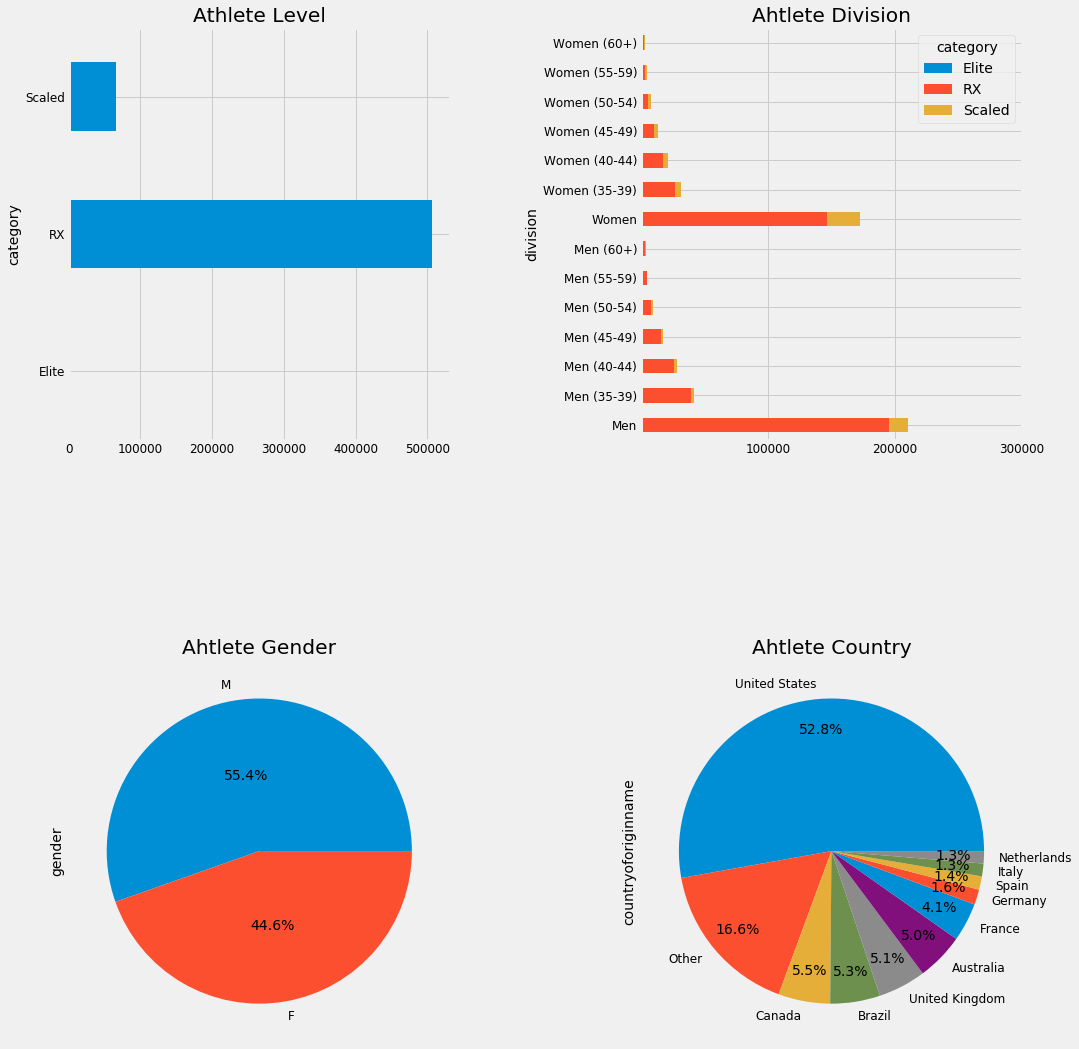

In [26]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(15,15))
crossfit_open_athletes_2019_filtered.groupby('category').competitorid.count().plot.barh(title='Athlete Level', ax=ax1);
crossfit_open_athletes_2019_filtered.groupby(['division','category']).size().unstack().plot.barh(title="Ahtlete Division", ax=ax2, stacked=True, xticks=[100000,200000,300000]);
crossfit_open_athletes_2019_filtered.gender.value_counts().plot(kind='pie'
                                                                , autopct='%1.1f%%'
                                                                , pctdistance=0.5
                                                                , title='Ahtlete Gender'
                                                                , ax=ax3);
crossfit_open_athletes_2019_filtered.countryoforiginname.value_counts().plot(kind="pie"
                                 , autopct='%1.1f%%'
                                 , pctdistance=0.8
                                 , title='Ahtlete Country'
                                 , ax=ax4);
plt.tight_layout()
fig.subplots_adjust(wspace=0.5)
fig.subplots_adjust(hspace=0.5)

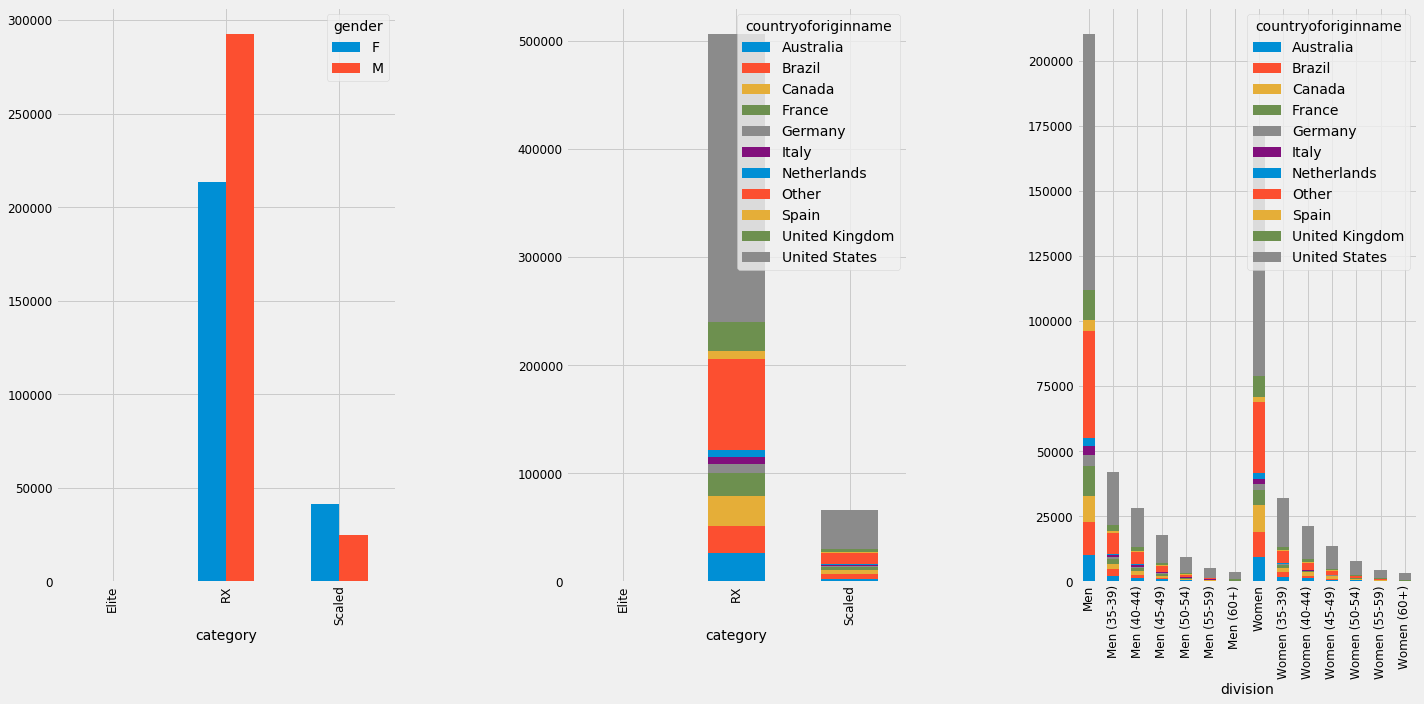

In [27]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(20,10))
crossfit_open_athletes_2019_filtered.groupby(['category']).gender.value_counts().unstack().plot.bar(ax=ax1);
crossfit_open_athletes_2019_filtered.groupby(['category']).countryoforiginname.value_counts().unstack().plot.bar(ax=ax2,stacked=True);
crossfit_open_athletes_2019_filtered.groupby(['division']).countryoforiginname.value_counts().unstack().plot.bar(ax=ax3,stacked=True);
plt.tight_layout()
fig.subplots_adjust(wspace=0.5)
fig.subplots_adjust(hspace=0.5)

In [28]:
crossfit_open_athletes_2019_filtered[['height', 'weight', 'age']].describe()

,height,weight,age
count,304823.000000,323754.000000,572653.000000
mean,1.743674,78.343412,37.164978
std,1.439308,44.720039,9.012462
min,0.010000,-9054.150000,16.000000
25%,1.670000,67.000000,31.000000
50%,1.750000,78.930000,37.000000
75%,1.800000,88.450000,43.000000
max,266.240000,16960.000000,125.000000


In [29]:
height_lower_cap = crossfit_open_athletes_2019_filtered.height.quantile(0.02) # 1.5 m
height_upper_cap = crossfit_open_athletes_2019_filtered.height.quantile(0.99) # 1.96 m
weight_lower_cap = crossfit_open_athletes_2019_filtered.weight.quantile(0.01) # 51 kg
weight_upper_cap = crossfit_open_athletes_2019_filtered.weight.quantile(0.99) # 120.2 kg
age_lower_cap = crossfit_open_athletes_2019_filtered.age.min() # 16 years
#crossfit_open_athletes_2019_filtered.loc[crossfit_open_athletes_2019_filtered.age>=90].count()
age_upper_cap = 90

In [30]:
def hammond_ideal_weight_funct(height:list, height_units:str="cm"):
    if height_units == "cm":
        return 48 + 1.1 * (100*np.array(height) - 150)
    else:
        raise NotImplementedError
        
crossfit_athletes_height = np.array(crossfit_open_athletes_2019_filtered[~crossfit_open_athletes_2019_filtered.height.isna()].height.values.tolist())
ideal_open_athletes_weight = hammond_ideal_weight_funct(crossfit_athletes_height)

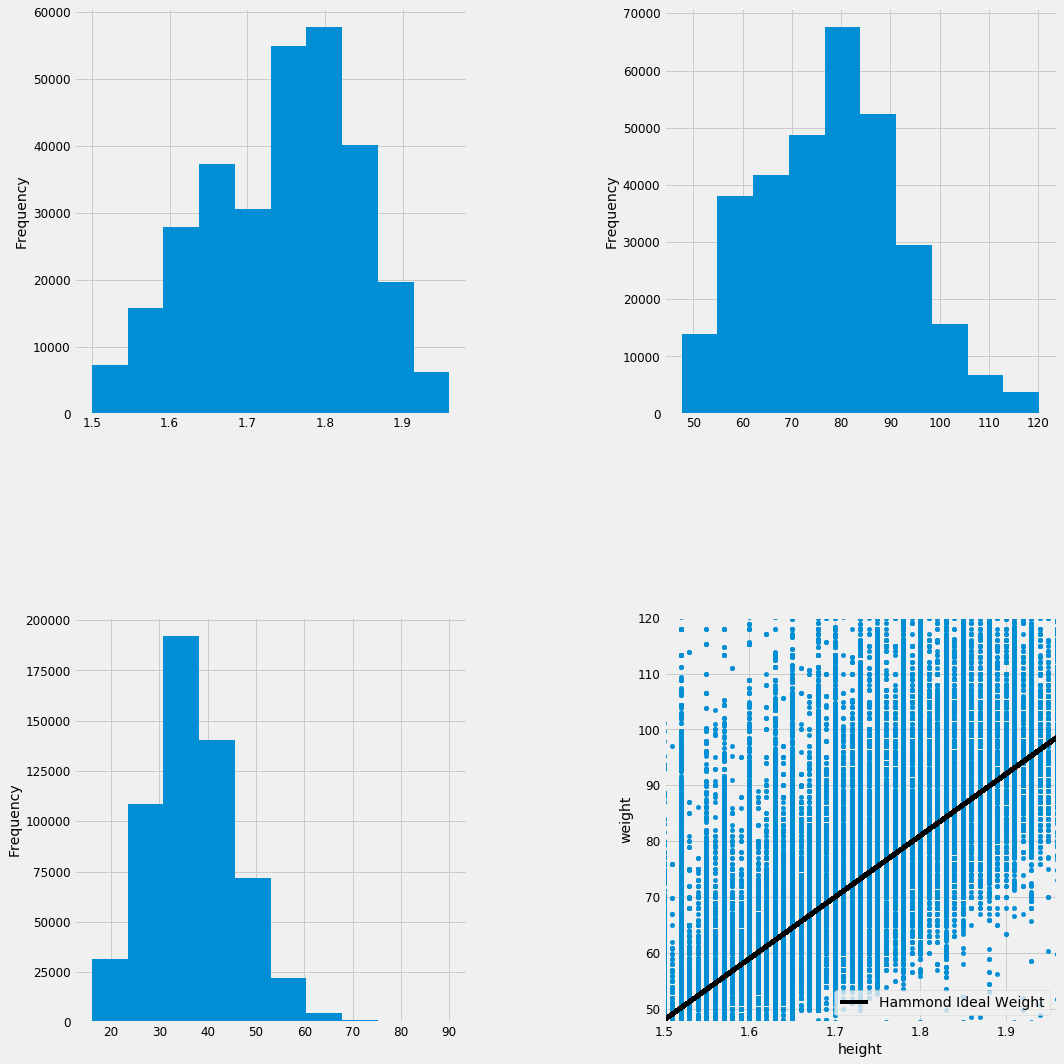

In [31]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(15,15))

crossfit_open_athletes_2019_filtered.height.plot.hist(bins = 10, range=(height_lower_cap, height_upper_cap), ax=ax1);

crossfit_open_athletes_2019_filtered.weight.plot.hist(bins = 10,range=(weight_lower_cap, weight_upper_cap), ax=ax2);

crossfit_open_athletes_2019_filtered.age.plot.hist(bins = 10,range=(age_lower_cap, age_upper_cap), ax=ax3);

crossfit_open_athletes_2019_filtered.plot.scatter(x='height'
                                                  , y='weight'
                                                  , xlim=(height_lower_cap, height_upper_cap)
                                                  , ylim=(weight_lower_cap, weight_upper_cap)
                                                  , ax=ax4
                                                  )

ax4.plot(crossfit_athletes_height
         , ideal_open_athletes_weight, color='black'
         , label='Hammond Ideal Weight')
ax4.legend()
plt.tight_layout()
fig.subplots_adjust(wspace=0.5)
fig.subplots_adjust(hspace=0.5)

## Crossfit Feature Engineering

In [32]:
crossfit_open_athletes_2019_filtered \
    .loc[~crossfit_open_athletes_2019_filtered.height.between(height_lower_cap,height_upper_cap),"height"]= np.NaN

In [33]:
crossfit_open_athletes_2019_filtered \
    .loc[~crossfit_open_athletes_2019_filtered.weight.between(weight_lower_cap,weight_upper_cap),"weight"]= np.NaN

In [34]:
crossfit_open_athletes_2019_filtered.groupby(['category','gender'])[['height','weight','age']].mean()

height     weight        age
category gender                                
Elite    F       1.642132  64.170863  30.028571
         M       1.764203  84.353333  28.702128
RX       F       1.648699  64.585918  36.540843
         M       1.788658  85.197630  37.109214
Scaled   F       1.637224  65.422700  38.881165
         M       1.779337  85.036555  40.443398

In [35]:
crossfit_open_athletes_2019_filtered.groupby(['division'])[['height','weight']].mean()

,height,weight
division,,
Men,1.787823,84.769128
Men (35-39),1.790021,85.708976
Men (40-44),1.790306,86.384304
Men (45-49),1.786197,86.335767
Men (50-54),1.788085,86.345748
Men (55-59),1.783449,85.596828
Men (60+),1.779241,83.432764
Women,1.647943,64.637313
Women (35-39),1.648580,65.098595


In [36]:
crossfit_open_athletes_2019_filtered.groupby(['countryoforiginname','gender'])[['height','weight','age']].mean()

height     weight        age
countryoforiginname gender                                
Australia           F       1.655935  65.478928  36.762373
                    M       1.791785  85.507675  37.042218
Brazil              F       1.635683  61.894697  33.885338
                    M       1.768036  82.094416  34.323619
Canada              F       1.650046  64.789270  37.600754
                    M       1.789354  85.852537  38.383209
France              F       1.647965  60.287266  33.839630
                    M       1.782267  79.989338  34.615535
Germany             F       1.681166  64.123707  34.380119
                    M       1.811741  85.486323  36.079349
Italy               F       1.650384  60.175508  35.191932
                    M       1.778798  79.820069  36.263439
Netherlands         F       1.693677  65.633409  35.500161
                    M       1.825282  84.368599  36.777905
Other               F       1.651033  62.716980  34.481889
                    M       1.783431  83.040964  35.294560
Spain               F       1.642176  59.794988  35.148705
                    M       1.773280  80.182135  35.655561
United Kingdom      F       1.650598  64.240534  36.643559
                    M       1.792677  84.808431  36.826447
United States       F       1.644197  65.486391  38.077171
                    M       1.789979  86.867932  38.886996

In [37]:
crossfit_open_athletes_2019_filtered.isna().mean()

competitorid           0.000000
gender                 0.000000
countryoforiginname    0.000000
affiliateid            0.000000
age                    0.000000
height                 0.480642
weight                 0.444631
overallrank            0.000000
overallscore           0.000000
division               0.000000
category               0.000000
dtype: float64

In [38]:
crossfit_open_athletes_2019_filtered.isna().mean()

competitorid           0.000000
gender                 0.000000
countryoforiginname    0.000000
affiliateid            0.000000
age                    0.000000
height                 0.480642
weight                 0.444631
overallrank            0.000000
overallscore           0.000000
division               0.000000
category               0.000000
dtype: float64

In [39]:
crossfit_open_athletes_2019_filtered[crossfit_open_athletes_2019_filtered.height.isna()].weight.isna().mean()

0.86221166178004

In [40]:
from sklearn.preprocessing import StandardScaler
######
crossfit_open_athletes_2019_filtered['gender'].replace({'F':0,'M':1},inplace=True)
crossfit_open_athletes_2019_filtered['gender'] = crossfit_open_athletes_2019_filtered['gender'].astype('bool')
df_encoded = crossfit_open_athletes_2019_filtered[['competitorid','gender','age','height','weight','overallrank','division','category']]
df_encoded.fillna(df_encoded.mean(),inplace=True)
labels_binning = ['top_10','top_100','top_1000','top_10000','top_100000','top_200000']
no_bins = [0,10,100,1000,10000,100000,200000]
df_encoded['open_rank'] = pd.cut(df_encoded['overallrank'], bins=no_bins, labels=labels_binning)
# from sklearn.impute import KNNImputer
# imputer = KNNImputer(n_neighbors=3)
# df_encoded[['height','weight']] = imputer.fit_transform(df_encoded[['height','weight']])
scaler = StandardScaler()
df_encoded[['age', 'height','weight']] = StandardScaler().fit_transform(df_encoded[['age', 'height','weight']])
####
df_encoded = df_encoded[['competitorid','open_rank','division','age', 'height','weight','category']]
df_encoded = pd.get_dummies(df_encoded, columns=['open_rank','category'])

In [41]:
crossfit_open_scores_2019 = pd.read_csv(crossfit_open_scores_2019_file)

In [43]:
df_encoded_2 = crossfit_open_scores_2019.copy()
labels_binning = ['top_10','top_100','top_1000','top_10000','top_100000','top_200000']
no_bins = [0,10,100,1000,10000,100000,200000]
df_encoded_2['wod_rank'] = pd.cut(df_encoded_2['rank'], bins=no_bins, labels=labels_binning)
df_encoded_2 = df_encoded_2[['competitorid','wod_rank','division']]
df_encoded_2 = pd.get_dummies(df_encoded_2, columns=['wod_rank'])
df_encoded_2 = df_encoded_2.groupby(['competitorid','division']).sum().reset_index()
df_encoded_3 = df_encoded.merge(df_encoded_2, on=['competitorid','division'], how='inner')

## Modelling Crossfit Data

In [97]:
df_encoded_4 = pd.read_csv(crossfit_games_athletes_2019_file)

In [98]:
df_encoded_4['games_rank'] = df_encoded_4['overallrank'].apply(pd.to_numeric, errors='coerce')

In [99]:
df_encoded_4 = df_encoded_4[['competitorid','games_rank','division']]

In [100]:
df_encoded_4['games_rank'].fillna(999,inplace=True)

In [101]:
labels_binning = ['top_10','top_100','top_1000']
no_bins = [0,10,100,1000]
df_encoded_4['games_rank'] = pd.cut(df_encoded_4['games_rank'], bins=no_bins, labels=labels_binning)

In [200]:
model_data = df_encoded_3.merge(df_encoded_4, on=['competitorid','division'], how='left')

In [201]:
model_data.head()

,competitorid,gender,age,height,weight,overallrank,division,open_rank_top_10,open_rank_top_100,open_rank_top_1000,...,category_Elite,category_RX,category_Scaled,wod_rank_top_10,wod_rank_top_100,wod_rank_top_1000,wod_rank_top_10000,wod_rank_top_100000,wod_rank_top_200000,games_rank
0,2536,False,-0.018306,-0.555091,-1.578787,1,Women (35-39),1,0,0,...,1,0,0,3,2,0,0,0,0,NaN
1,485089,False,-0.129263,0.018453,-0.480969,2,Women (35-39),1,0,0,...,1,0,0,2,3,0,0,0,0,NaN
2,16973,False,-0.240221,-2.419110,-1.493909,3,Women (35-39),1,0,0,...,0,1,0,3,2,0,0,0,0,top_10
3,751083,False,-0.240221,-0.555091,-0.667514,4,Women (35-39),1,0,0,...,0,1,0,0,5,0,0,0,0,NaN
4,313257,False,-0.129263,-2.705882,-1.578787,5,Women (35-39),1,0,0,...,0,1,0,2,2,1,0,0,0,top_10


In [202]:
model_data = pd.get_dummies(model_data, columns=['division'])
model_data['games_rank'] = model_data['games_rank'].cat.add_categories('Not_Qualified')
model_data['games_rank'].fillna('Not_Qualified', inplace =True)
model_data['games_rank'] = model_data["games_rank"].cat.codes

In [203]:
model_data['games_rank'].value_counts() ## HIGHLY UNBALANCED

3    572265
1       165
0       139
2        84
Name: games_rank, dtype: int64

In [209]:
from sklearn.utils import resample
# Separate majority and minority classes
model_data_majority = model_data[model_data.games_rank==3]
model_data_minority = model_data[model_data.games_rank!=3]
 
# Downsample majority class
model_data_majority_downsampled = resample(model_data_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=model_data_minority.shape[0],     # to match minority class
                                 random_state=123) # reproducible results
 
# Combine minority class with downsampled majority class
model_data_downsampled = pd.concat([model_data_majority_downsampled, model_data_minority])
 
# Display new class counts
model_data_downsampled.games_rank.value_counts()

3    388
1    165
0    139
2     84
Name: games_rank, dtype: int64

In [212]:
model_data_downsampled.loc[model_data.competitorid==2536]

,competitorid,gender,age,height,weight,overallrank,open_rank_top_10,open_rank_top_100,open_rank_top_1000,open_rank_top_10000,...,division_Men (50-54),division_Men (55-59),division_Men (60+),division_Women,division_Women (35-39),division_Women (40-44),division_Women (45-49),division_Women (50-54),division_Women (55-59),division_Women (60+)
31953,2536,False,-0.018306,-0.555091,-1.578787,20,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [213]:
x = model_data_downsampled.drop(['competitorid','overallrank','games_rank'],axis=1)

In [214]:
y = model_data_downsampled['games_rank']

In [215]:
assert x.shape[0] == len(y)

In [216]:
x.head()

,gender,age,height,weight,open_rank_top_10,open_rank_top_100,open_rank_top_1000,open_rank_top_10000,open_rank_top_100000,open_rank_top_200000,...,division_Men (50-54),division_Men (55-59),division_Men (60+),division_Women,division_Women (35-39),division_Women (40-44),division_Women (45-49),division_Women (50-54),division_Women (55-59),division_Women (60+)
252803,True,-0.573093,1.618394e-01,6.215132e-01,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
338399,True,1.313185,1.308928e+00,3.075515e+00,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
381031,True,0.536482,-1.591905e-14,-1.325483e-15,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
171869,False,-0.905966,-1.591905e-14,-1.325483e-15,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
232625,True,1.646058,-1.591905e-14,-1.325483e-15,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0


In [217]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=0)
clf = GradientBoostingClassifier(random_state=0)
clf.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=0, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [218]:
y_pred = clf.predict(X_test)

In [221]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.88      0.93        40
           1       0.72      0.85      0.78        40
           2       0.79      0.55      0.65        20
           3       0.96      1.00      0.98        94

    accuracy                           0.90       194
   macro avg       0.87      0.82      0.84       194
weighted avg       0.90      0.90      0.89       194

